In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max.columns', None)

Exploratory Data Analysis with Python

Data visualization is a critical component of exploratory data analysis (EDA) that can help you quickly familiarize yourself with the data, as well as identify any outliers or missing values in your dataset. In this notebook, you will see how you can put Python and matplotlib to create some new chart types to explore the Global Superstore dataset. 

Global Superstore is a fictional international retail chain that sells office supplies to customers across the globe. The original dataset was stored in Excel and contained three sheets&mdash;`Orders`, `People`, and `Returns`. However, for this assignment you will only need to work with the sales data from the `Orders` sheet, where each row represents a single transaction. So that you can use pandas `read_csv()` function, the data from the `Orders` sheet has been saved as a separate CSV file (`"global_superstore_orders.csv"`) and is saved on Canvas in the `Datasets/` folder.

To begin, start by importing the CSV file into a pandas DataFrame. Additional code has already been added for you that takes advantage of the method's optional `dtype` parameter to change the columns in the `col` list to a `"category"` dtype.

Please note, that depending on where you downloaded the CSV file to your local computer, you may need to modify the filepath that is passed to the `pd.read_csv()` method. For example, here the filepath assumes that you have saved the `"global_superstore_orders.csv"` file one level up in a directory named `datasets`. If you have stored the file in the same folder as your Jupyter notebook, then you would only need to pass the method the name of the file.

Pandas `pandas.read_csv` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [3]:
# Import the Global Superstore dataset
df = pd.read_csv('../datasets/global_superstore_orders.csv')

# Create a list of the categorical columns
cols = ['Category', 'City', 'Country', 'Market', 'Order Priority',
        'Region', 'Segment', 'Ship Mode', 'State', 'Sub-Category']

# Convert columns to category data type
df[cols] = df[cols].astype('category')

# Print the first 5 rows
df.head(15)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
5,22732,IN-2013-42360,6/28/2013,7/1/2013,Second Class,JM-15655,Jim Mitchum,Corporate,Sydney,New South Wales,Australia,NaN,APAC,Oceania,TEC-PH-10000030,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.2750,897.35,Critical
6,30570,IN-2011-81826,11/7/2011,11/9/2011,First Class,TS-21340,Toby Swindell,Consumer,Porirua,Wellington,New Zealand,NaN,APAC,Oceania,FUR-CH-10004050,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.080,4,0.0,564.8400,894.77,Critical
7,31192,IN-2012-86369,4/14/2012,4/18/2012,Standard Class,MB-18085,Mick Brown,Consumer,Hamilton,Waikato,New Zealand,NaN,APAC,Oceania,FUR-TA-10002958,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled",5244.840,6,0.0,996.4800,878.38,High
8,40155,CA-2014-135909,10/14/2014,10/21/2014,Standard Class,JW-15220,Jane Waco,Corporate,Sacramento,California,United States,95823.0,US,West,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.960,5,0.2,1906.4850,867.69,Low
9,40936,CA-2012-116638,1/28/2012,1/31/2012,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,United States,28027.0,US,South,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,865.74,Critical


Here, display all columns and their data types.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Row ID          51290 non-null  int64   
 1   Order ID        51290 non-null  object  
 2   Order Date      51290 non-null  object  
 3   Ship Date       51290 non-null  object  
 4   Ship Mode       51290 non-null  category
 5   Customer ID     51290 non-null  object  
 6   Customer Name   51290 non-null  object  
 7   Segment         51290 non-null  category
 8   City            51290 non-null  category
 9   State           51290 non-null  category
 10  Country         51290 non-null  category
 11  Postal Code     9994 non-null   float64 
 12  Market          51290 non-null  category
 13  Region          51290 non-null  category
 14  Product ID      51290 non-null  object  
 15  Category        51290 non-null  category
 16  Sub-Category    51290 non-null  category
 17  Product Name

Next, call the DataFrame `describe()` method to see some statistical information about the Global Superstore dataset.

Pandas `describe` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [5]:
# Retrieve summary statistics 
df.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


# EDA Questions

Next, imagine that you've just been hired as a Data Analyst in Global Superstore's fast-paced Data Analytics division. You want to quickly get up to speed and learn more about your new employer. And now that you've had a chance to quickly look at your data, what questions do you have?

*Write in 2-3 questions that you are interested in learning about the data*  
1.  What customer is our largest purchaser of goods?
2.  What product sells the most?
3.  Are there differences in goods purchased based on georaphic location?

Now it's time to try out your new EDA skills! Working in this Jupyter notebook, you should create a minimum of 5 different types of visualizations to explore the data and to see whether it can be used to answer your questions. Each chart must also include a title, and you should be sure to label the x- and y-axis.

If you find that you aren't able to answer all of the questions you originally proposed, don't worry! As Data Analysts, we often don't know what type of insights or analysis is possible until we've had the chance to use some of the EDA techniques you've learned in class. What is important here to complete this assignment is to show your work in the Jupyter notebook and to answer the questions explaining what you discovered while exploring this dataset.

In [6]:
plt.style.use('ggplot')

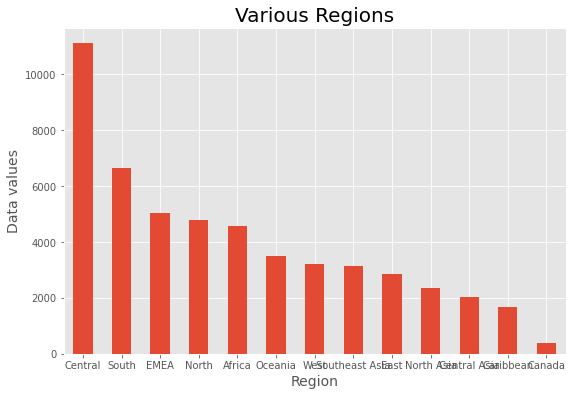

In [7]:
df.value_counts(normalize=True).plot(kind='bar')
df["Region"].value_counts().plot(kind="bar", figsize=(9,6), rot=0)

# Add a title
plt.title('Various Regions', size = 20)

# Label the x- and y-axis
plt.xlabel('Region', size = 14)
plt.ylabel('Data values', size = 14);

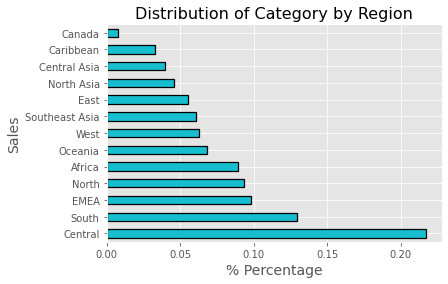

In [8]:
# Create a bar chart using pandas and save in a variable named "ax"
ax = df["Region"].value_counts(normalize=True).plot.barh(color="tab:cyan", linewidth = 1.25, edgecolor = "k")

# Add a title
ax.set_title("Distribution of Category by Region", size = 16)

# Label the x- and y-axis
plt.xlabel('% Percentage', size = 14)
plt.ylabel('Sales', size = 14);


# Rotate the xticks
ax.xaxis.set_tick_params(rotation=0);

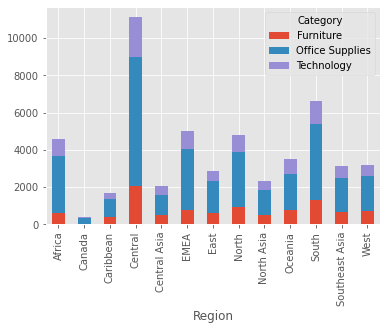

In [9]:
df.groupby(["Region", "Category"]).size().unstack().plot(kind="bar", stacked = True);

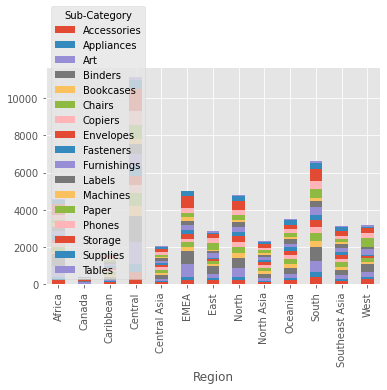

In [10]:
df.groupby(["Region", "Sub-Category"]).size().unstack().plot(kind="bar", stacked = True);

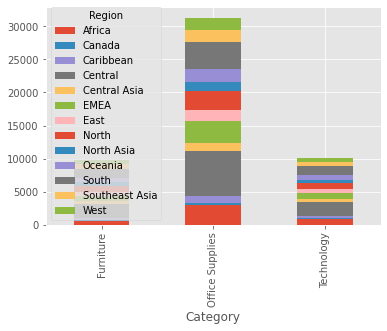

In [11]:
df.groupby(["Category", "Region"]).size().unstack().plot(kind="bar", stacked = True);

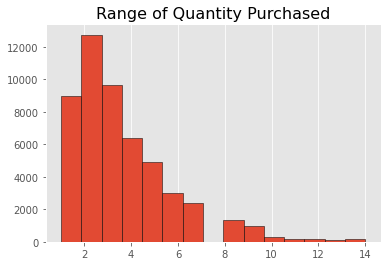

In [12]:
# Plot the distribution of the "flipper_length_mm" feature
plt.hist(df["Quantity"], bins = 15, edgecolor = "k")

# Add a title
plt.title("Range of Quantity Purchased", size = 16)

# Add grid lines
plt.grid(axis = "y")

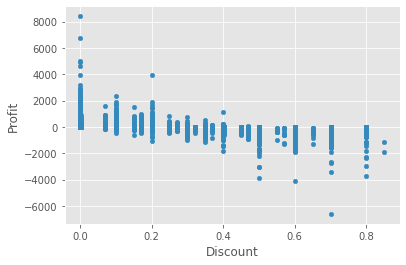

In [13]:
df.plot(x = "Discount", y = "Profit", kind = "scatter");

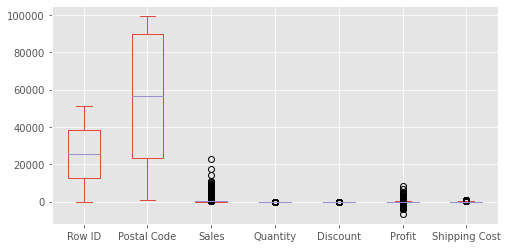

In [14]:
df.plot.box(figsize = (8,4));

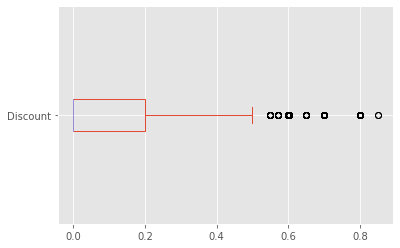

In [15]:
# Create a box plot for a single numerical feature
df["Discount"].plot.box(vert=False);

# Conclusions

What did you find out? Were you able to answer all of your original questions or did you have new questions come up as you explored the data? In 2-3 short paragraphs, please give a brief overview of what you discovered about your new employer. Was there anything that surprised you or did you find certain types of charts more helpful when you first began? 

**Answer:**  
My questions included:
1.  What customer is our largest purchaser of goods? -- Not answered. 
2.  What product sells the most? --  Yes answered. Office supplies sells the most. 
3.  Are there differences in goods purchased based on georaphic location? -- Yes answered. There do not seem to be differences in products purchased (tech, office supply, furniture) region by reion. Although certain regions purchased more than others. 

Yes and no - some of my answers were answered. As I continued to graph various data points, I soon realized how massive my data set was. Therefore, it was unrealistic to identify which customer was purchasing the most amount of goods. Instead, I graphed the region where we had the most sales. 

I discovered that we conduct sales many different parts of the world, we have the most orders completed in the Central Region and the least in Canada. I found that Office Supplies is our most common category of product sold, next is Technology, and the least is Furniture. 

I learned that giving out discounts is nonprofitable, as the higher the discount offered, the less profit the company produces. Additionally, the Sales & Profit column do not have a wide variation but has many outliers. Outliers in data can distort the data distribution, affect predictions (if used in a model) and affect the overall accuracy of estimates if they are not detected and handled, especially in bi-variate analysis (such as linear modeling).

I wonder which of our sub-category products are sold most often, by whom, and which client of our clients spends the most money.  

# Submission

Before submitting this assignment, it is important to complete these final two steps:
- Rename your Jupyter notebook by clicking on "`1_Matplotlib_EDA_homework`" at the top of the page and adding your last name. For example: `1_Matplotlib_EDA_homework_McIntyre`
- Restart and run your Jupyter notebook by clicking `Kernel` and then `Restart & Run All`
- Save your Jupyter notebook by clicking the save icon on the toolbar

Finally, go to the homework assignment page on Canvas and click the `Submit Assignment` button on the upper right-hand corner of the page. Next, scroll towards the bottom of the page and select the `File Upload` box to choose and attach a copy of your Jupyter notebook (`.ipynb`).

Please remember that the assignment is due by the end of the following day at midnight. If you have any questions or find yourself struggling, please don't hesitate to reach out!